In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Configura para que os plots sejam exibidos diretamente no notebook
%matplotlib inline

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
normal='1'
anomalia='-1'

# Executar notebook coleta dos dados

In [3]:
%run "./1) TCC - Coleta, Processamento e Transformação dos Dados_1_4.ipynb"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49358 entries, 0 to 49357
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   valor_dirf              49358 non-null  float64
 1   rend_total              49358 non-null  float64
 2   rend_tributavel         49358 non-null  float64
 3   base_calculo            49358 non-null  float64
 4   trabalho                49358 non-null  float64
 5   aluguel                 49358 non-null  float64
 6   rend_capital            49358 non-null  float64
 7   autonomo                49358 non-null  float64
 8   livro_caixa             49358 non-null  float64
 9   rural                   49358 non-null  float64
 10  ganho_capital           49358 non-null  float64
 11  exterior                49358 non-null  float64
 12  outros_rend             49358 non-null  float64
 13  rend_isento             49358 non-null  float64
 14  rend_exclusivo          49358 non-null

# Análise e Exploração dos Dados

In [4]:
print('Dataset: ', df.shape[0], 'linhas e', df.shape[1], 'colunas')
print('Normal:  ', df.query('alvo=='+normal).shape[0], 'registros -', 
      round(df.query('alvo=='+normal).shape[0]/len(df)*100, 2), '% do dataset')
print('Anômala:   ', df.query('alvo=='+anomalia).shape[0], 'registros - ', 
      round(df.query('alvo=='+anomalia).shape[0]/len(df)*100, 2), '% do dataset')

Dataset:  49358 linhas e 47 colunas
Normal:   39498 registros - 80.02 % do dataset
Anômala:    9860 registros -  19.98 % do dataset


## Funções Auxiliares para Geração dos Gráficos

In [5]:
# Colocar label com valores nos gráficos de barra
def autolabel(rects, f, ax=None):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

In [6]:
# Gera os gráficos das duas matrizes de correlação, Pearson e Keandall
def correlacao(colunas, a=10, b=3, square=False, annot=True):
    plt.figure(figsize=(a, b))
    plt.subplot(1, 2, 1)
    ax1 = sns.heatmap(corr.loc[colunas][colunas], cmap="GnBu", vmin = -1, vmax = 1,
                xticklabels=colunas, square=square,
                yticklabels=colunas,
                annot=annot, fmt='.2f')
    plt.xticks(rotation=90) 
    plt.yticks(rotation=0)     
    ax1.set(title='Pearson')

    plt.subplot(1, 2, 2)
    ax2 = sns.heatmap(corrK.loc[colunas][colunas], cmap="GnBu", vmin = -1, vmax = 1,
                xticklabels=colunas, square=square,
                yticklabels=False,
                annot=annot, fmt='.2f')
    plt.xticks(rotation=90) 
    plt.yticks(rotation=0)     
    ax2.set(title='Kendall')

    plt.tight_layout()
    plt.show()

In [7]:
# Gera gráficos de dispersão
def dispersao(colunas, nomes, query="", a=15, b=5):
    plt.figure(figsize=(a, b))
    plt.subplot(1, 2, 1)
    plt.scatter(colunas[0], colunas[1], data=df.query('alvo==' + normal), alpha=0.5, color='green', label='Normal')
    plt.scatter(colunas[0], colunas[1], data=df.query('alvo==' + anomalia), alpha=0.5, color='red', label='Anomalia')
    plt.xlabel(nomes[0])
    plt.ylabel(nomes[1])
    plt.title(nomes[0] + " x " + nomes[1])
    plt.legend()

    if query != '':
        plt.subplot(1, 2, 2)
        plt.scatter(colunas[0], colunas[1], data=df.query(query + ' and alvo=='+ normal), alpha=0.5, color='green', label='Normal')
        plt.scatter(colunas[0], colunas[1], data=df.query(query + ' and alvo=='+ anomalia), alpha=0.5, color='red', label='Anomalia')
        plt.xlabel(nomes[0])
        plt.ylabel(nomes[1])
        plt.title(nomes[0] + " x " + nomes[1] + " - Zoom")
        plt.legend()
    
    plt.tight_layout()
    plt.show()

In [8]:
# Gera gráficos de contagem de declarações
def grupo(grupo, nome, query=''):
    sns.set_style('ticks')
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(df.query('alvo=='+ normal if query=='' else query + ' and alvo==' + normal).groupby([grupo], as_index=False).count().iloc[:,1:2], label="Normais", c="g")
    plt.xlabel(nome)
    plt.ylabel('Quantidade')
    plt.title('Declarações por ' + nome + ' - Normais')

    plt.subplot(1, 2, 2)
    plt.plot(df.query('alvo=='+ anomalia if query=='' else query + ' and alvo=='+ anomalia).groupby([grupo], as_index=False).count().iloc[:,1:2], label="Anômalas", c="r")
    plt.xlabel(nome)
    plt.ylabel('Quantidade')
    plt.title('Declarações por ' + nome + ' - Anômalas')
    plt.show()

In [9]:
# Gera gráficos com a média por faixa
def media(colunas, nomes, query='', divisao=[1], tipo='int', orig=True):
    plt.figure(figsize=(15, 5))
    if orig==True:
        plt.subplot(1, len(divisao) + 1, 1)
        plt.plot(colunas[0], colunas[1], data=df.query('alvo=='+ normal).groupby(df[colunas[0]], as_index=False).mean(), color='green', label='Normais')
        plt.plot(colunas[0], colunas[1], data=df.query('alvo=='+ anomalia).groupby(df[colunas[0]], as_index=False).mean(), color='red', label='Anômalas')
        plt.xlabel(nomes[0])
        plt.ylabel(nomes[1])
        plt.title("Média de " + nomes[1] + " por " + nomes[0])
        plt.legend()
    
    if query != '' or divisao[0] != 1:
        for i in range(len(divisao)):
            plt.subplot(1, len(divisao) + 1, i+2)
            plt.plot(colunas[0], colunas[1], data=df.query('alvo=='+ normal if query=='' else query + ' and alvo=='+ normal).groupby((df[colunas[0]]/divisao[i]).astype(tipo), as_index=False).mean(), color='green', label='Normais')
            plt.plot(colunas[0], colunas[1], data=df.query('alvo=='+ anomalia if query=='' else query + ' and alvo=='+ anomalia).groupby((df[colunas[0]]/divisao[i]).astype(tipo), as_index=False).mean(), color='red', label='Anômalas')
            plt.xlabel(nomes[0])
            plt.ylabel(nomes[1])
            if query != '':
                plt.title("Zoom")
            if divisao[i] != 1: 
                plt.title("Faixa: " + str(divisao[i]))
            if query != '' and divisao[i] != 1: 
                plt.title("Zoom - Faixa: " + str(divisao[i]))
        plt.legend()
    plt.show()

In [10]:
# Gera gráficos de pizza
def pizza(colunas, labels, titulo):
    rendN = df.query("alvo=="+ normal)[colunas].sum()
    rendA = df.query("alvo=="+ anomalia)[colunas].sum()
    explode = np.zeros(len(colunas))
    explode[0] = 0.1

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.pie(rendN, labels=labels, autopct='%1.1f%%', explode=explode)
    plt.title(titulo + ' Normais')

    plt.subplot(1, 2, 2)
    plt.pie(rendA, labels=labels, autopct='%1.1f%%', explode=explode)
    plt.title(titulo + ' Anômalas')
    plt.legend(labels, loc=1)

    plt.tight_layout()
    plt.show()

In [11]:
# Gera gráfico de barras
def barras(coluna, nome, label='', a=6, b=4):
    normais = df.query('alvo=='+ normal).groupby(coluna)[coluna].count().rename("count")
    anomalo = df.query('alvo=='+ anomalia).groupby(coluna)[coluna].count().rename("count")
    fig, ax = plt.subplots(figsize=(a, b))
    x =  np.arange(len(normais))
    rec1 = ax.bar(x, normais, width=0.25, label = 'Normais', color='g')
    x2 = [j + 0.25 for j in x]
    rec2 = ax.bar(x2, anomalo, width=0.25, label = 'Anômalas', color='r')
    autolabel(rec1, '{}', ax)
    autolabel(rec2, '{}', ax)

    if label!='':
        plt.xticks([x + 0.125 for x in range(len(label))], label)

    plt.legend(loc='upper center')

    plt.title("Declarações por " + nome + " - Normais x Anômalas")
    plt.show()

In [12]:
# Gera gráfico de barras com percentual
def percentual(coluna, nome, label='', a=6, b=4):
    normais = df.query('alvo=='+ normal).groupby(coluna)[coluna].count().rename("count")
    anomalo = df.query('alvo=='+ anomalia).groupby(coluna)[coluna].count().rename("count")
    normais = normais / normais.sum() * 100
    anomalo = anomalo / anomalo.sum() * 100
        
    fig, ax = plt.subplots(figsize=(a, b))
    x =  np.arange(len(normais))
    rec1 = ax.bar(x, normais, width=0.25, label = 'Normais', color='g')
    x2 = [j + 0.25 for j in x]
    rec2 = ax.bar(x2, anomalo, width=0.25, label = 'Anômalas', color='r')
    autolabel(rec1, '{0:.2f}%', ax)
    autolabel(rec2, '{0:.2f}%', ax)

    if label!='':
        plt.xticks([x + 0.125 for x in range(len(normais))], label)

    plt.legend(loc='upper center')

    plt.title("% de Declarações por " + nome + " - Normais x Anômalas")
    plt.show()

In [13]:
# Colocar label com valores nos gráficos de barra horizontal
def autolabelH(rects, f, ax=None):
    for rect in rects:
        width = rect.get_width() 
        height = rect.get_y() + rect.get_height() / 2
        ax.annotate(f.format(width),
                    xy=(width+1,height),
                    ha='right', va='center', fontsize=8)

In [14]:
# Gera gráfico de barras com percentual
def percentualH(coluna, nome, label='', a=6, b=4):
    normais = df.query('alvo=='+ normal).groupby(coluna)[coluna].count().rename("count")
    normais = normais / normais.sum() * 100
    anomalo = df.query('alvo=='+ anomalia).groupby(coluna)[coluna].count().rename("count")
    anomalo = anomalo / anomalo.sum() * 100
    fig, ax = plt.subplots(figsize=(a, b))
    x =  np.arange(len(normais))
    rec1 = ax.barh(x, normais, height=0.30, label = 'Normais', align ='edge',color='g')
    x2 = [j + 0.25 for j in x]
    rec2 = ax.barh(x2, anomalo, height=0.30, label = 'Anômalas', align ='edge',color='r')
    autolabelH(rec1, '{0:.2f}%', ax)
    autolabelH(rec2, '{0:.2f}%', ax)

    if label=='':
        plt.yticks([i + 0.15 for i in range(len(normais))], normais.index)
    else:
        plt.yticks([i + 0.15 for i in range(len(normais))], label)

    plt.legend(loc='upper right')

    plt.title("% de Declarações por " + nome + " - Normais x Anômalas")
    plt.show()

In [15]:
# Gera gráficos de histograma
def histograma(coluna, nome, query='', bins=50):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.title("Histograma " + nome + " - Normais")
    df.query('alvo=='+ normal if query=='' else query + ' and alvo=='+ normal)[coluna].hist(bins=bins) 
    plt.subplot(1, 2, 2)
    plt.title("Histograma " + nome + " - Anômalas")
    df.query('alvo=='+ anomalia if query=='' else query + ' and alvo=='+ anomalia)[coluna].hist(bins=bins) 

In [16]:
def table_perc(campo):
    t_normais = df.query('alvo=='+ normal).groupby(campo)[campo].count().rename("Normais")
    t_anomalo = df.query('alvo=='+ anomalia).groupby(campo)[campo].count().rename("Anômalas")
    t_normais = (t_normais / t_normais.sum() * 100).reset_index()
    t_anomalo = (t_anomalo / t_anomalo.sum() * 100).reset_index()
    return pd.merge(t_normais, t_anomalo, on=campo, how='outer').sort_values(by='Anômalas', ascending=False)

## Atributos Relevantes

### Idade

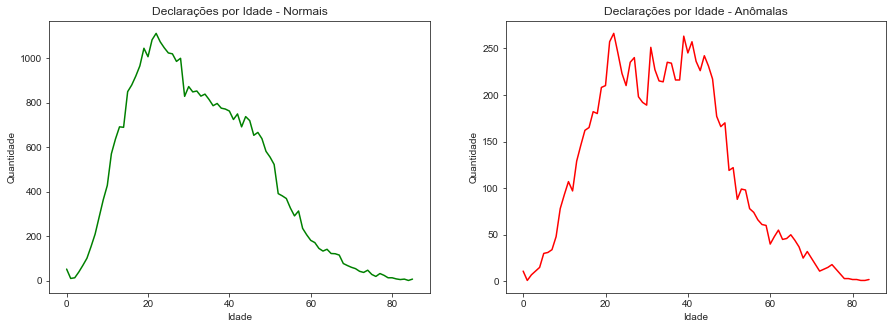

In [17]:
grupo('idade','Idade')

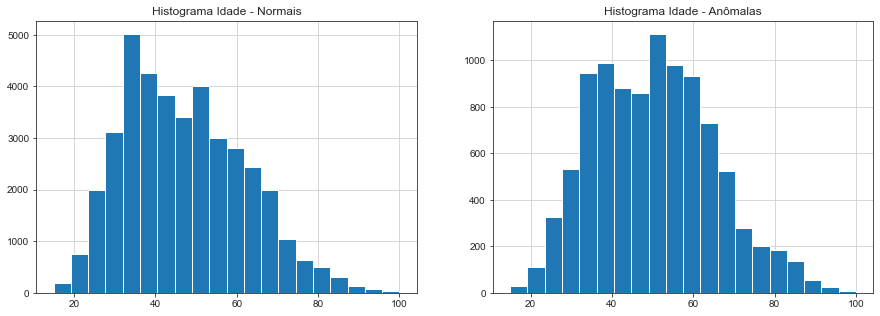

In [18]:
histograma('idade', 'Idade', '', 20)

#### Rendimentos Tributábeis por Idade

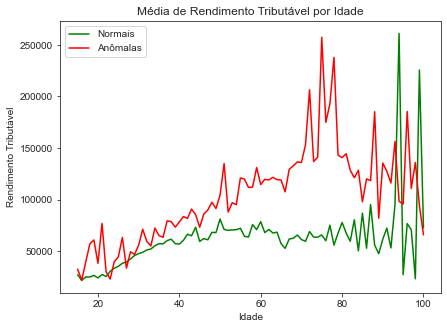

In [19]:
media(['idade', 'rend_tributavel'], ['Idade', 'Rendimento Tributável'])

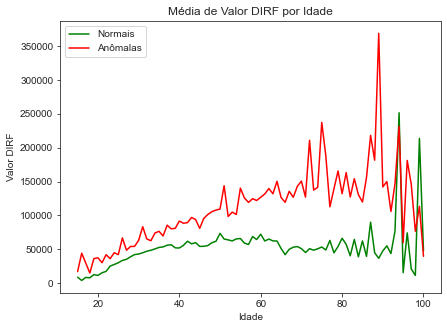

In [20]:
media(['idade', 'valor_dirf'], ['Idade', 'Valor DIRF'])

#### Gastos Médicos por Idade

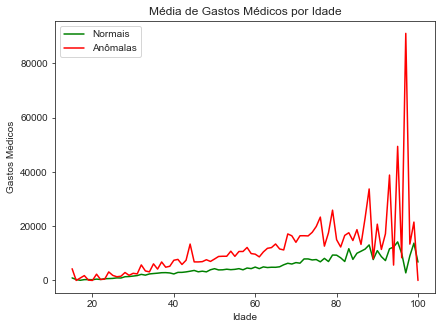

In [21]:
media(['idade', 'gmedicos'], ['Idade', 'Gastos Médicos'])

#### Gastos Educativos por Idade

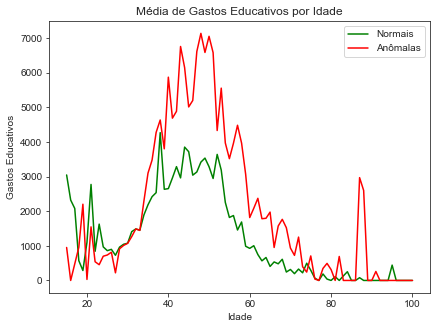

In [22]:
media(['idade', 'geducativos'], ['Idade', 'Gastos Educativos'])

### Alíquota 

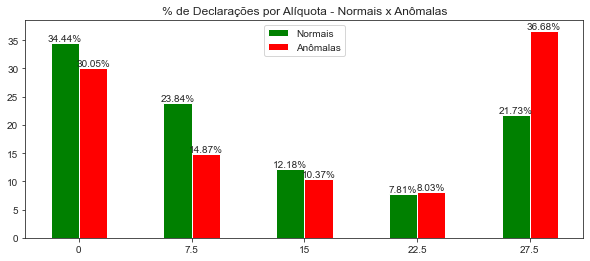

In [23]:
percentual('aliquota', 'Alíquota', [0, 7.5, 15, 22.5, 27.5], 10, 4)

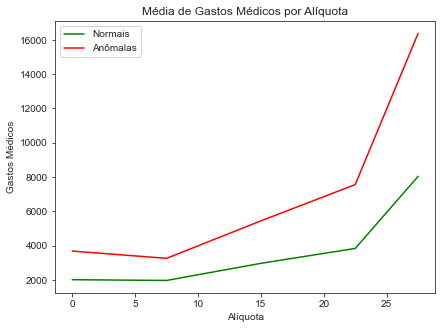

In [24]:
media(['aliquota', 'gmedicos'], ['Alíquota', 'Gastos Médicos'])

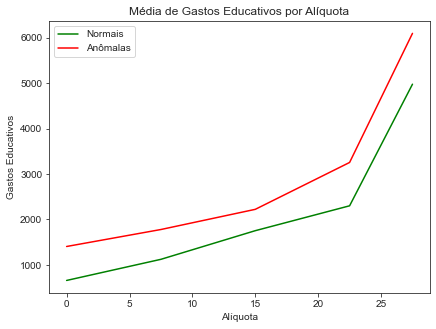

In [25]:
media(['aliquota', 'geducativos'], ['Alíquota', 'Gastos Educativos'])

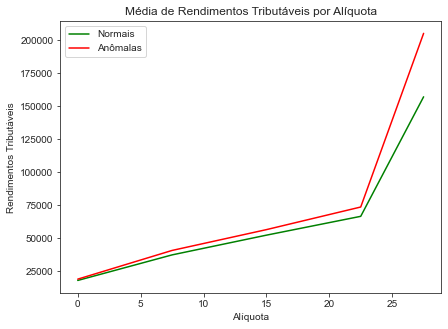

In [26]:
media(['aliquota', 'rend_tributavel'], ['Alíquota', 'Rendimentos Tributáveis'])

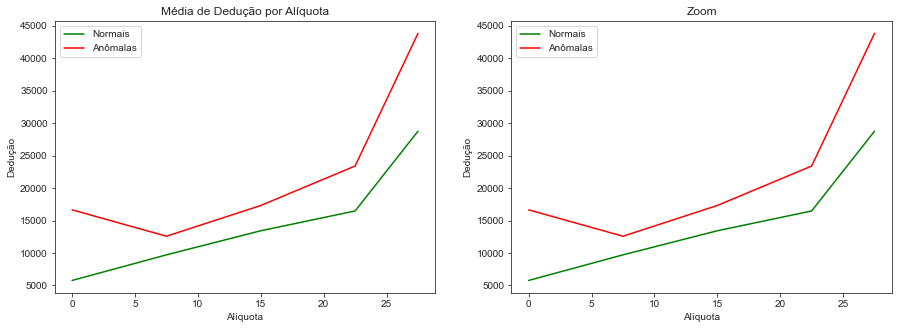

In [27]:
media(['aliquota', 'deducao'], ['Alíquota', 'Dedução'], 'deducao < 20000000000')

### Sexo

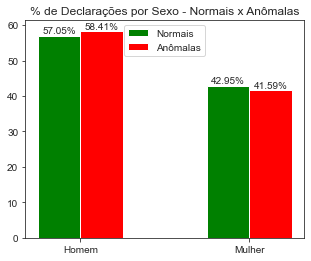

In [28]:
percentual('sexo', 'Sexo', ['Homem', 'Mulher'], 5, 4)

### Tipo de Declaração (Individual, Conjunta ou Separada) e Estado Civil

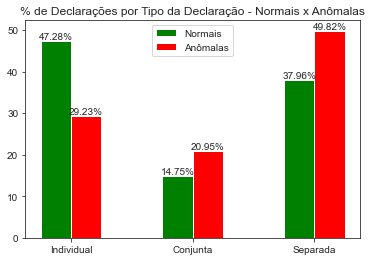

In [29]:
percentual('tipo_decl', 'Tipo da Declaração', ['Individual', 'Conjunta', 'Separada'])

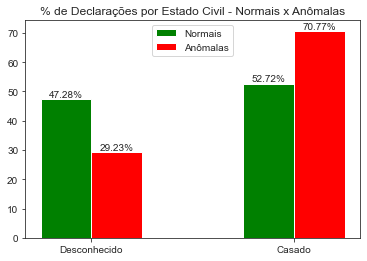

In [30]:
percentual('casado', 'Estado Civil', ['Desconhecido', 'Casado'])

In [31]:
table = pd.pivot_table(df, values=['base_calculo'], index=['tipo_decl'], 
                       columns=['casado'], aggfunc='count',fill_value=0)
table

base_calculo       
casado               0      1
tipo_decl                    
1                21558      0
2                    0   7893
3                    0  19907

### Forma de Tributação

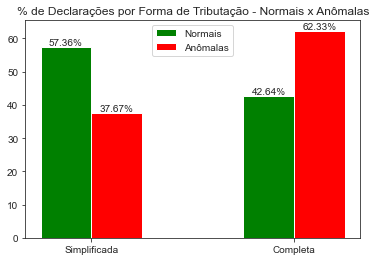

In [32]:
percentual('completa', 'Forma de Tributação', ['Simplificada', 'Completa'])

### Natureza Ocupação e Ocupação Principal

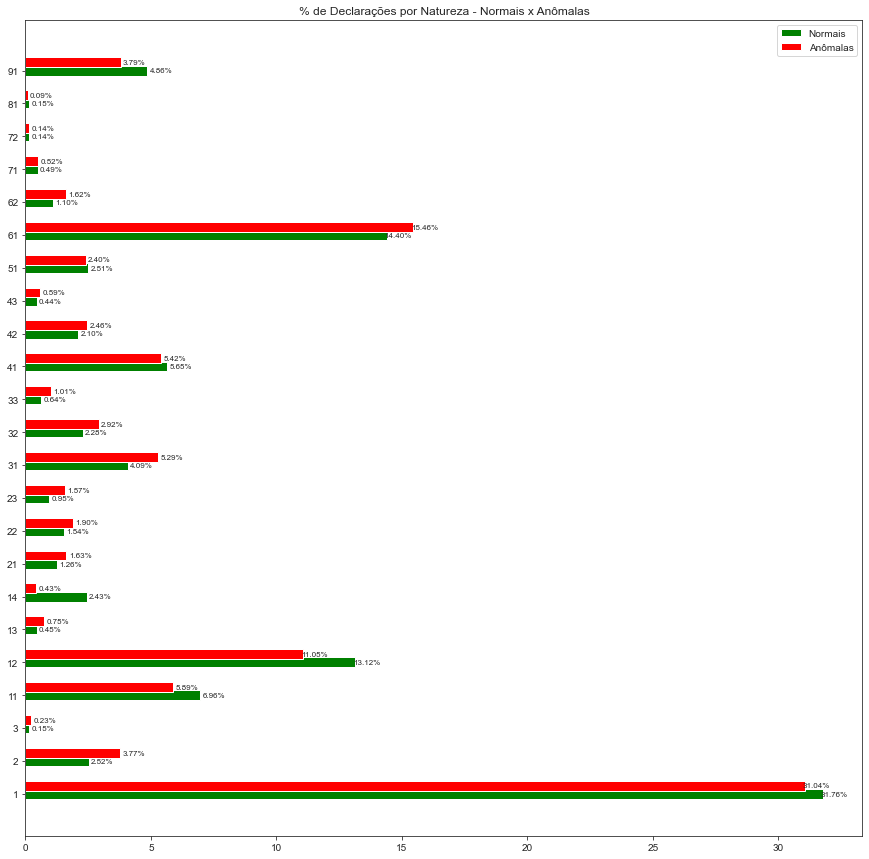

In [33]:
percentualH('natureza', 'Natureza', a=15,b=15)

In [34]:
table_perc('natureza').head(10)

,natureza,Normais,Anômalas
0,1,31.761102,31.044625
17,61,14.395666,15.456389
4,12,13.124715,11.054767
3,11,6.957314,5.892495
13,41,5.648387,5.415822
10,31,4.091346,5.294118
22,91,4.858474,3.793103
1,2,2.516583,3.772819
11,32,2.276065,2.920892
14,42,2.101372,2.464503


In [35]:
table_perc('ocupacao').head(10)

,ocupacao,Normais,Anômalas
130,999.0,17.684440,17.423935
0,0.0,19.114892,15.496957
23,120.0,7.468733,7.089249
99,410.0,4.268571,4.107505
63,291.0,3.668540,4.056795
36,225.0,1.182338,3.326572
25,130.0,2.471011,3.123732
64,292.0,1.622867,2.586207
38,227.0,1.481088,2.535497
31,214.0,1.630462,2.139959


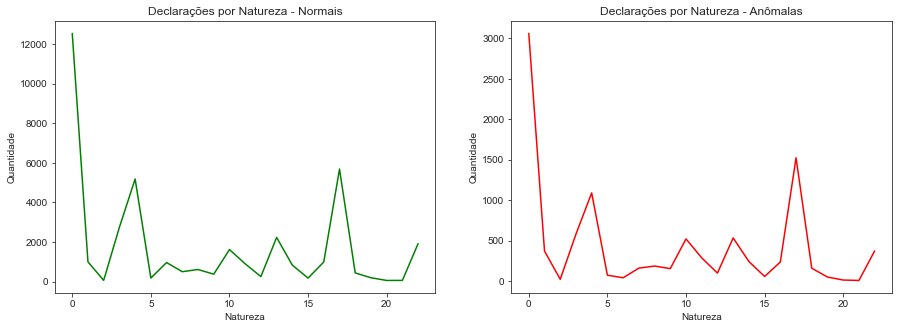

In [36]:
grupo('natureza', 'Natureza')

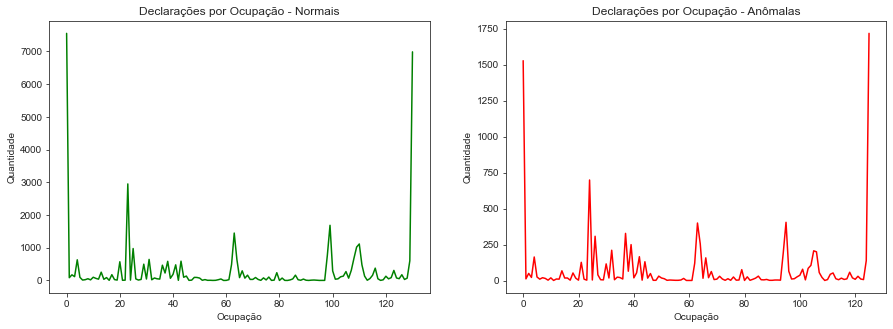

In [37]:
grupo('ocupacao', 'Ocupação')

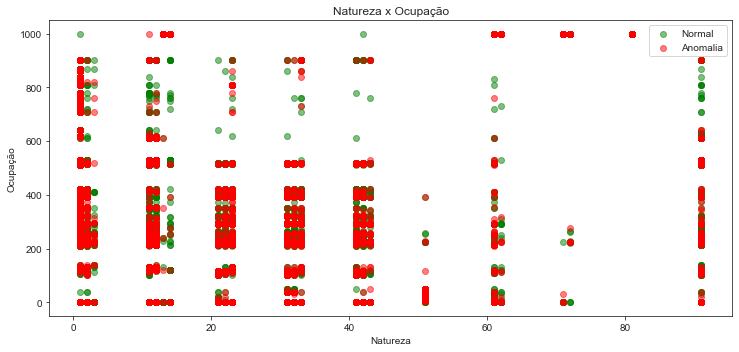

In [38]:
dispersao(['natureza', 'ocupacao'], ['Natureza', 'Ocupação'], a=20)

### População e Gini

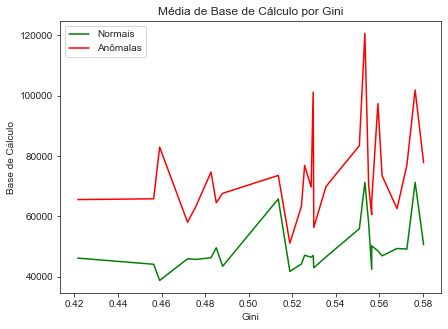

In [39]:
media(['gini', 'base_calculo'], ['Gini', 'Base de Cálculo'])

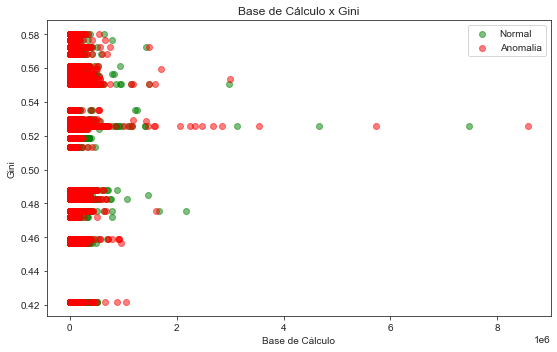

In [40]:
dispersao(['base_calculo', 'gini'], ['Base de Cálculo', 'Gini'])

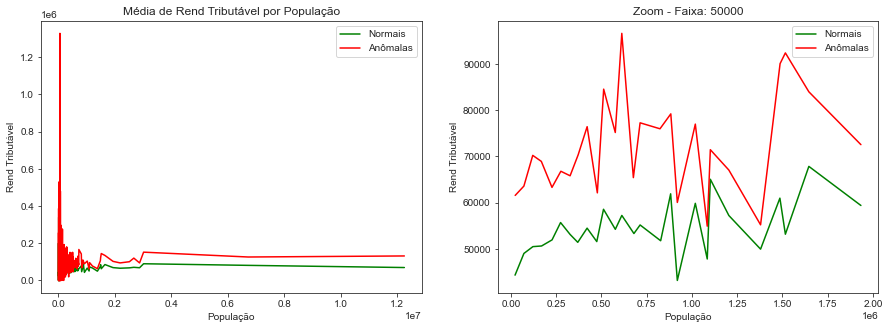

In [41]:
media(['POPULACAO', 'rend_tributavel'], ['População', 'Rend Tributável'], 
      'POPULACAO<2000000 and rend_tributavel<300000', [50000])

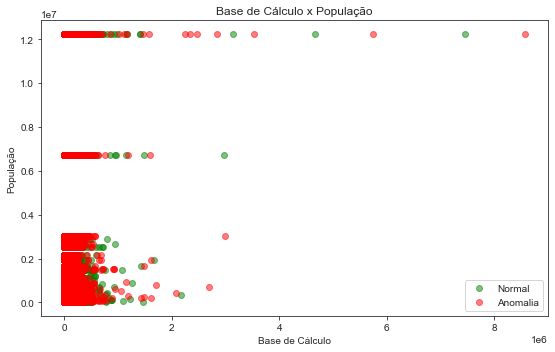

In [42]:
dispersao(['base_calculo', 'POPULACAO'],['Base de Cálculo', 'População'])

## Variáveis Redundantes e Correlacionadas

### Matriz de Correlação - Pearson e Keandall

In [43]:
# Calculando as matrizes de correlação
corr = df.corr()
corrK = df.corr(method='kendall')

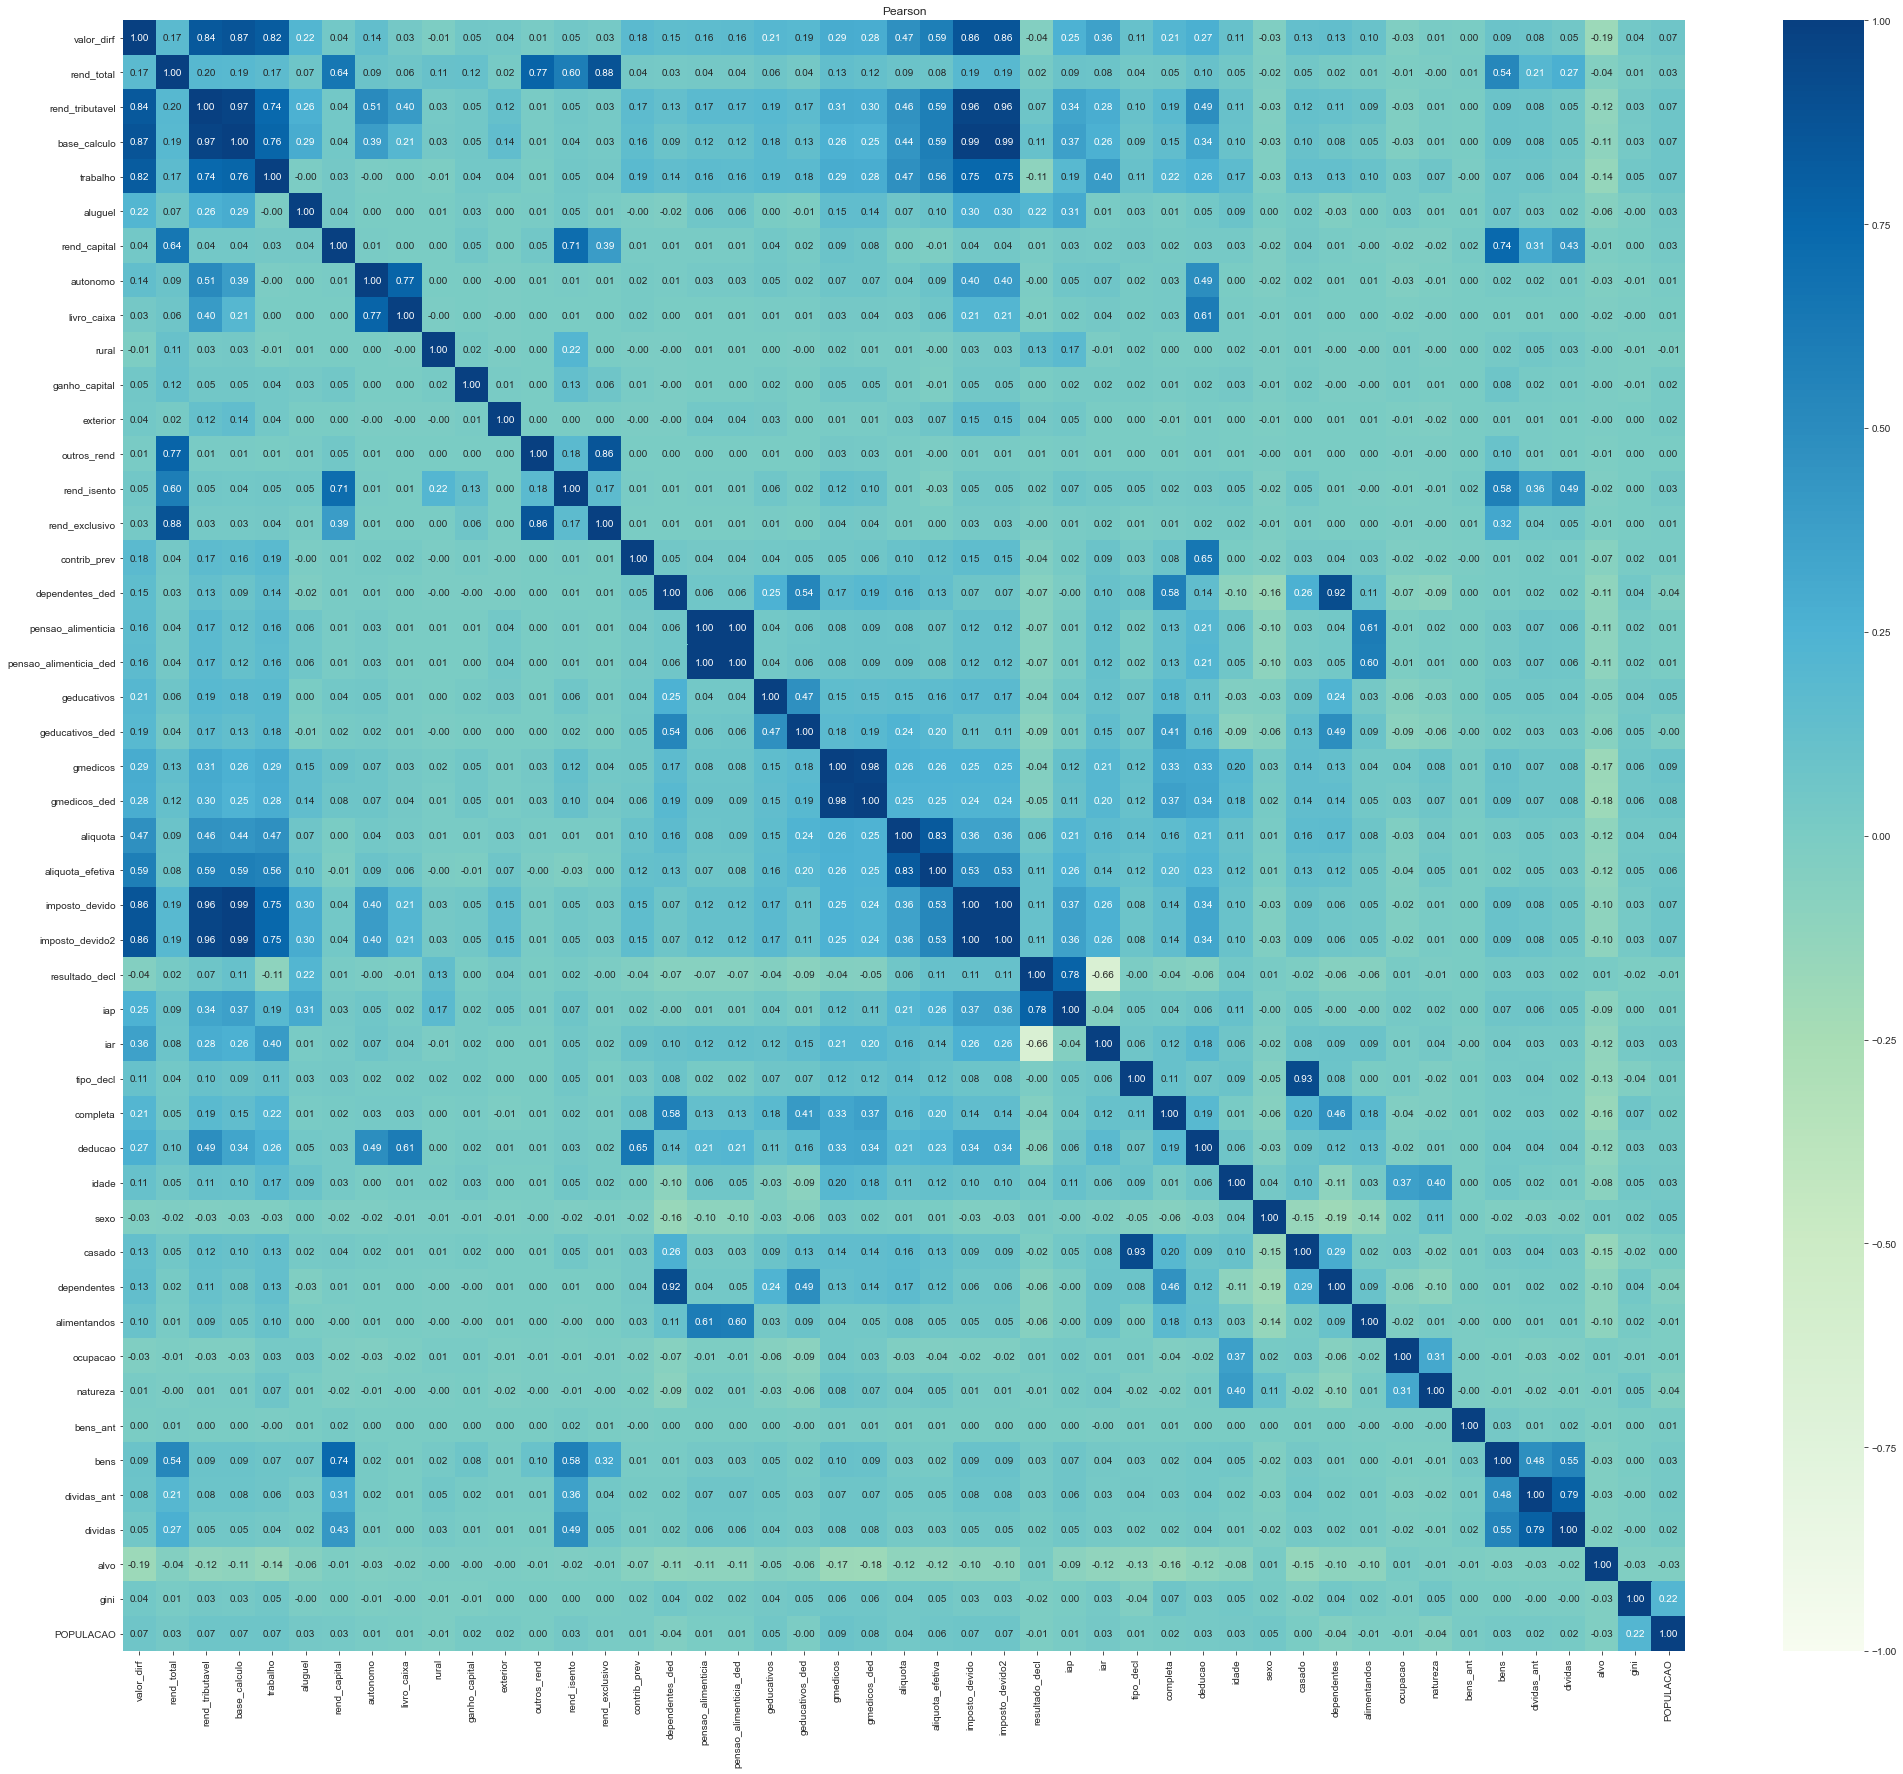

In [44]:
plt.figure(figsize=(35, 30))
ax = sns.heatmap(corr, cmap="GnBu", vmin = -1, vmax = 1,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True, fmt='.2f')
ax.set(title='Pearson')
plt.show()

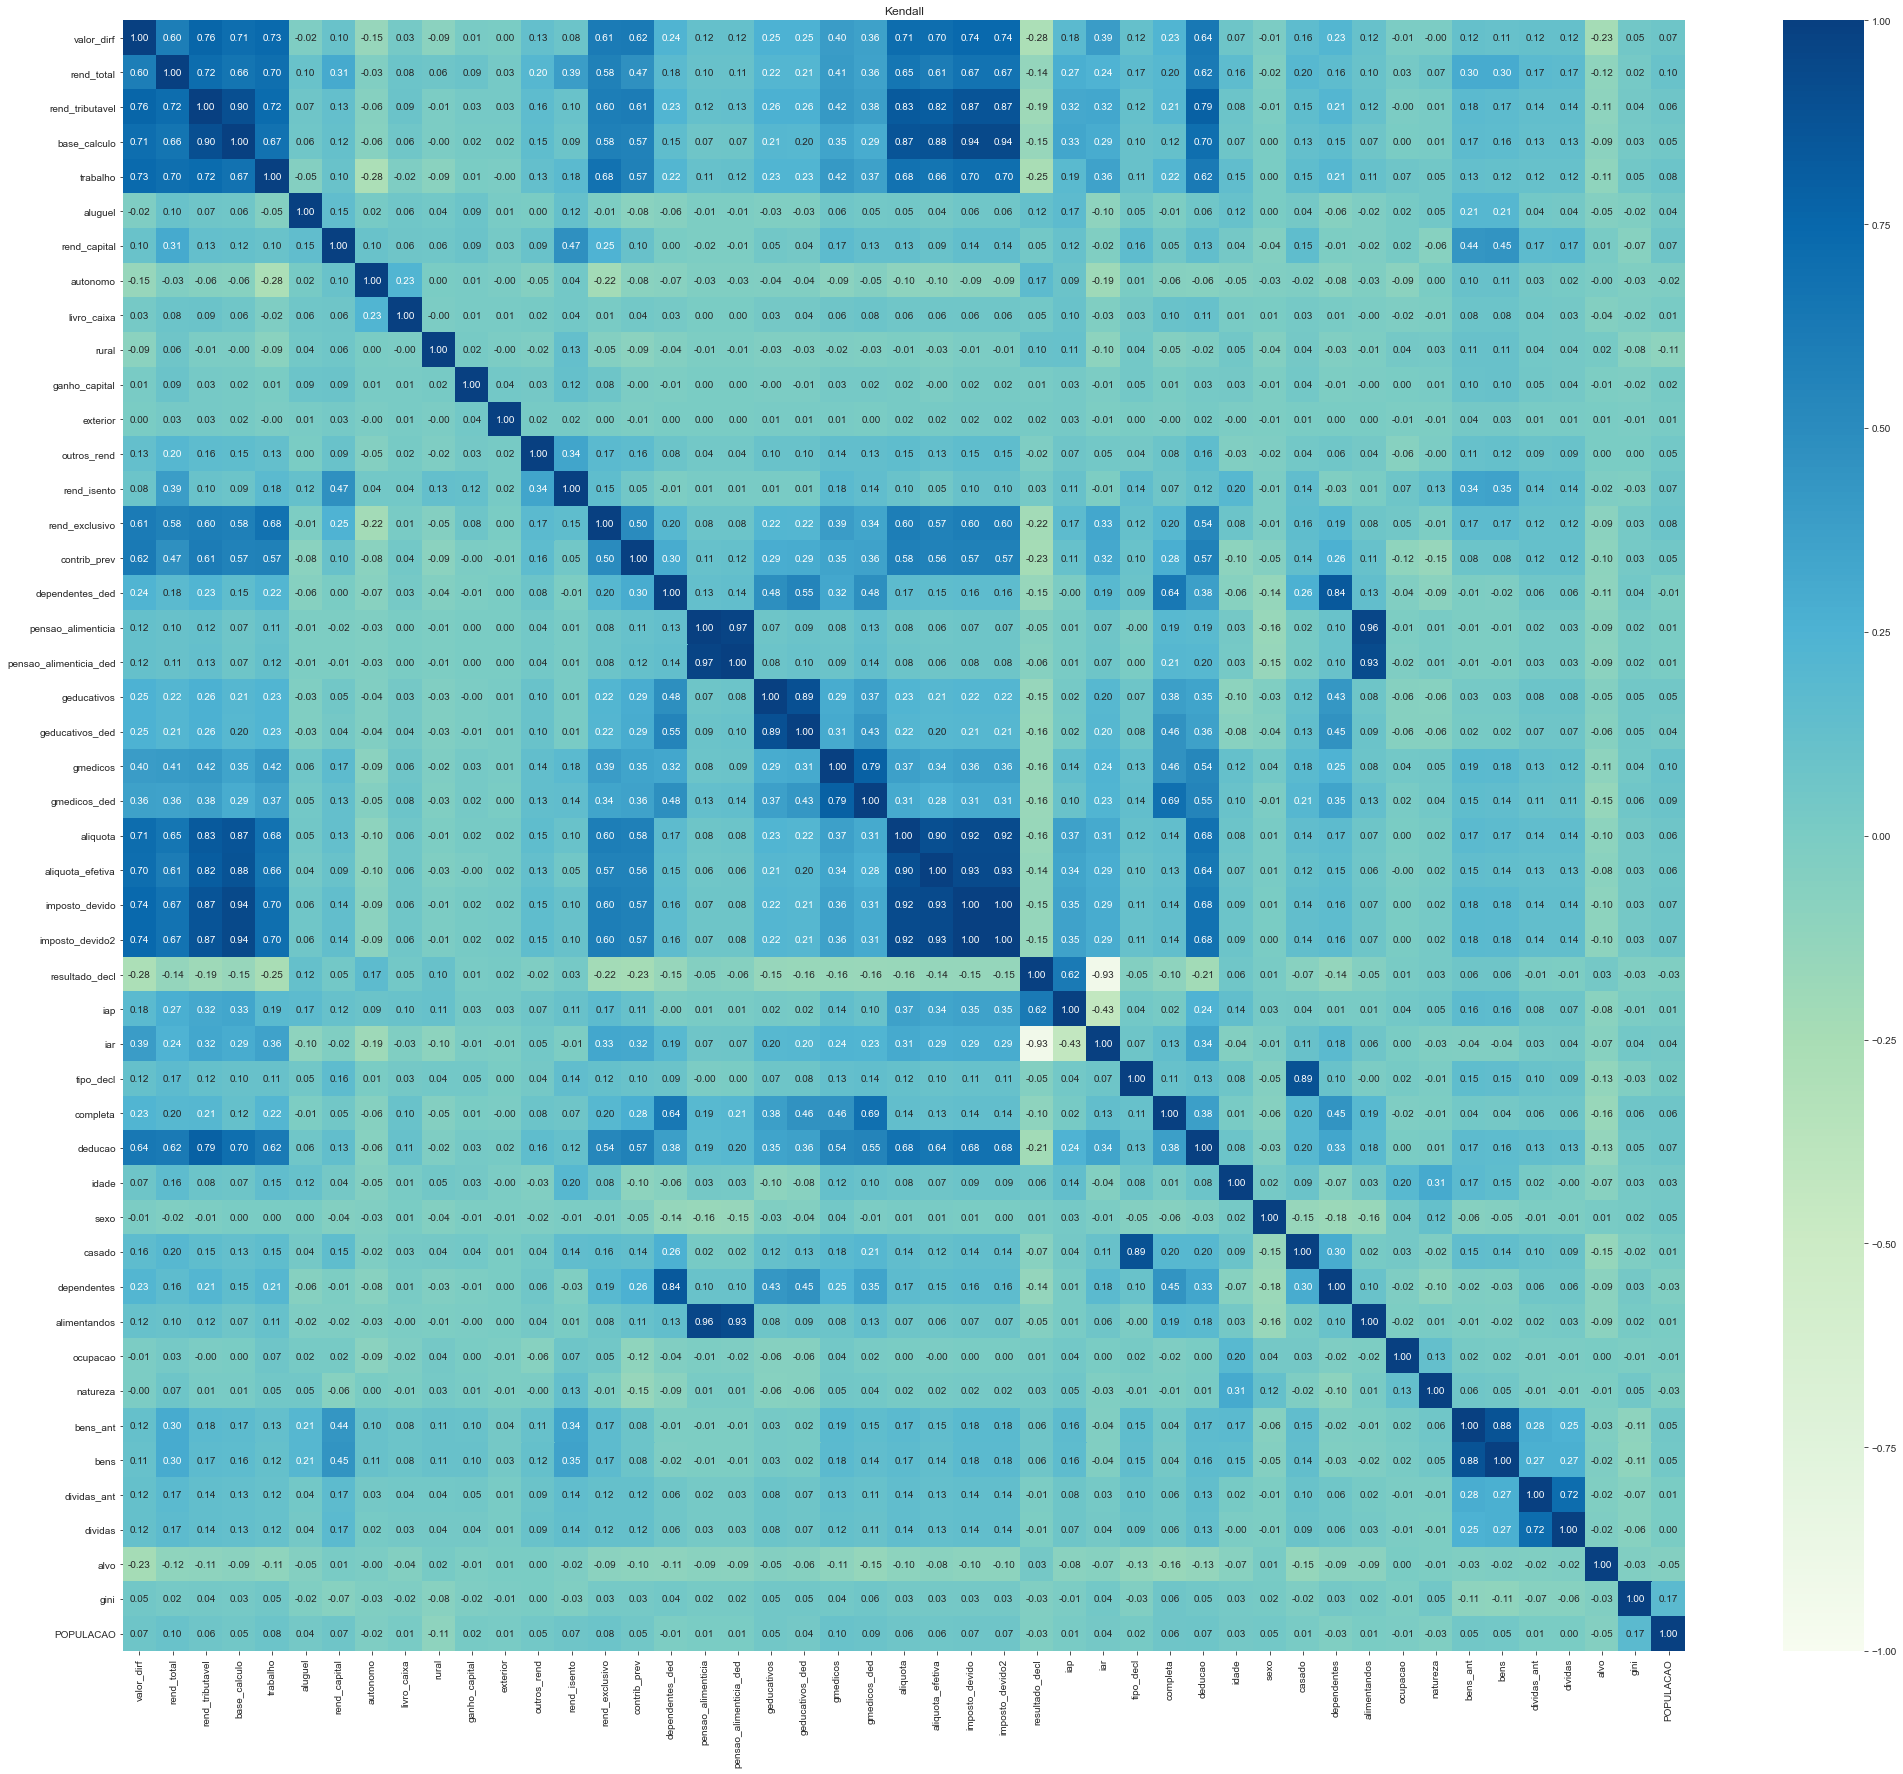

In [45]:
plt.figure(figsize=(35, 30))
ax = sns.heatmap(corrK, cmap="GnBu", vmin = -1, vmax = 1,
            xticklabels=corrK.columns,
            yticklabels=corrK.columns,
            annot=True, fmt='.2f')
ax.set(title='Kendall')
plt.show()

### Rendimento Tributável, Base de Cálculo e Imposto Devido

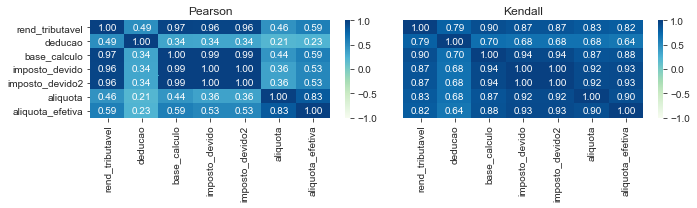

In [46]:
correlacao(['rend_tributavel','deducao','base_calculo', 'imposto_devido', 
            'imposto_devido2', 'aliquota', 'aliquota_efetiva'])

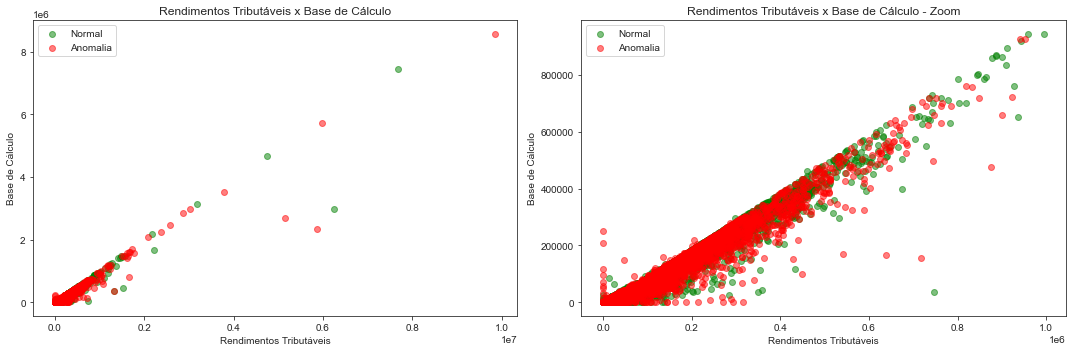

In [47]:
dispersao(['rend_tributavel', 'base_calculo'],['Rendimentos Tributáveis', 'Base de Cálculo'],
          'base_calculo<1000000 and rend_tributavel < 1000000')

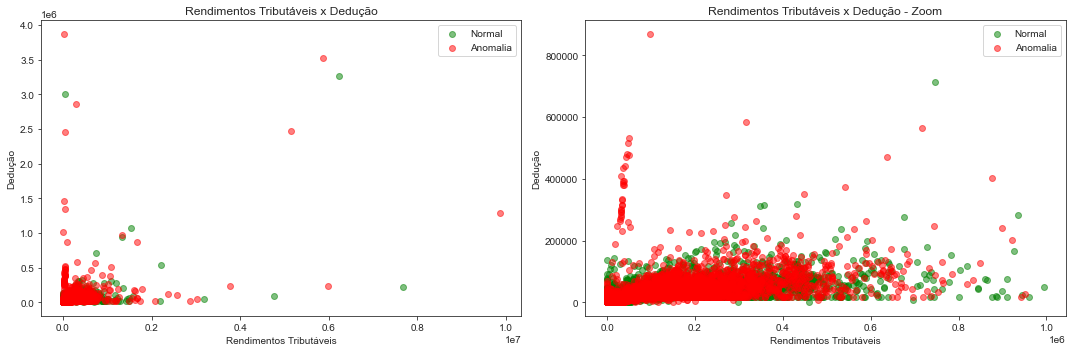

In [48]:
dispersao(['rend_tributavel', 'deducao'],['Rendimentos Tributáveis', 'Dedução'],
          'rend_tributavel<1000000 and deducao < 1000000')

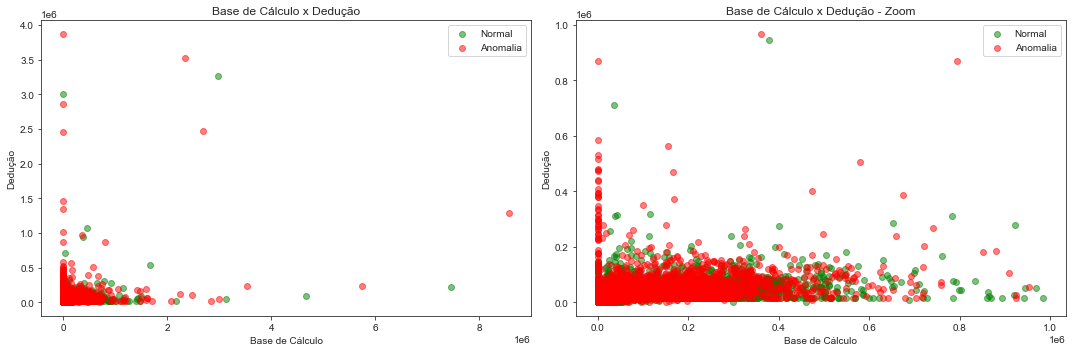

In [49]:
dispersao(['base_calculo', 'deducao'],['Base de Cálculo', 'Dedução'],
          'base_calculo<1000000 and deducao < 1000000')

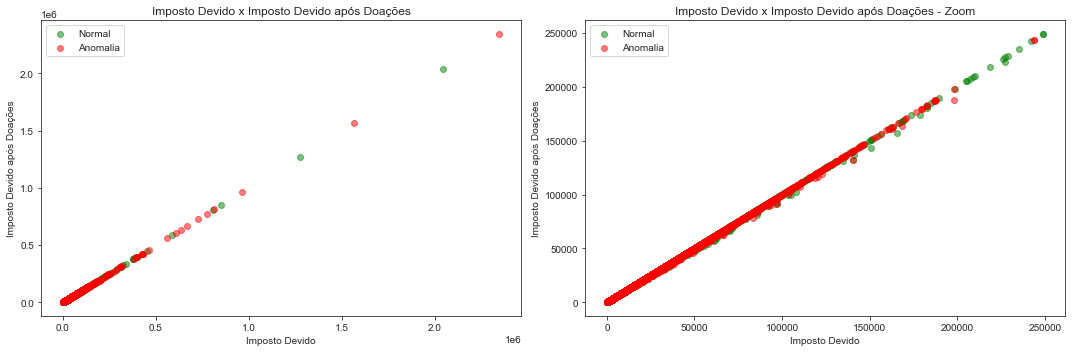

In [50]:
dispersao(['imposto_devido', 'imposto_devido2'],
          ['Imposto Devido', 'Imposto Devido após Doações'],
          'rend_tributavel<1000000')

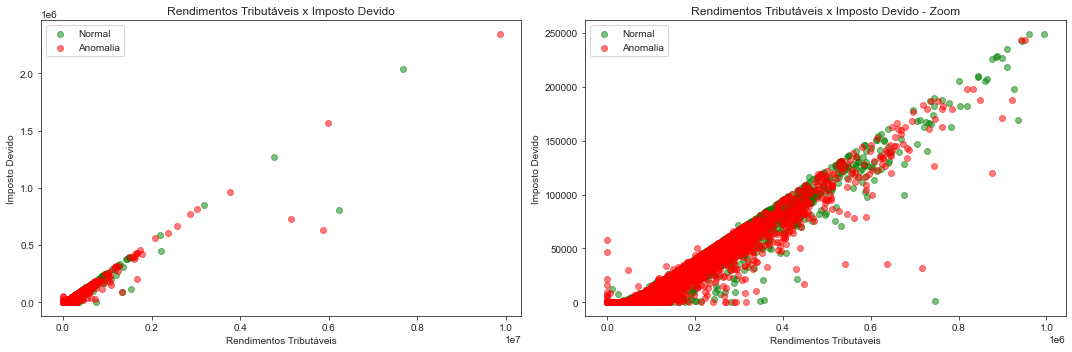

In [51]:
dispersao(['rend_tributavel', 'imposto_devido'],['Rendimentos Tributáveis', 'Imposto Devido'],
          'rend_tributavel<1000000')

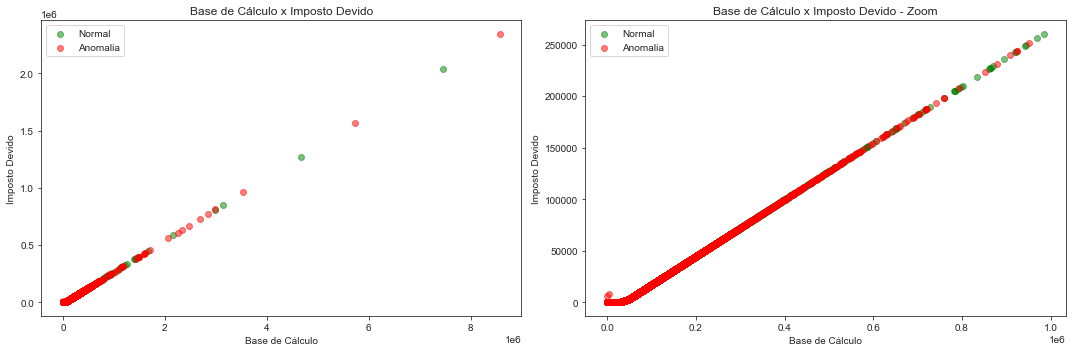

In [52]:
dispersao(['base_calculo', 'imposto_devido'],['Base de Cálculo', 'Imposto Devido'],
          'base_calculo<1000000')

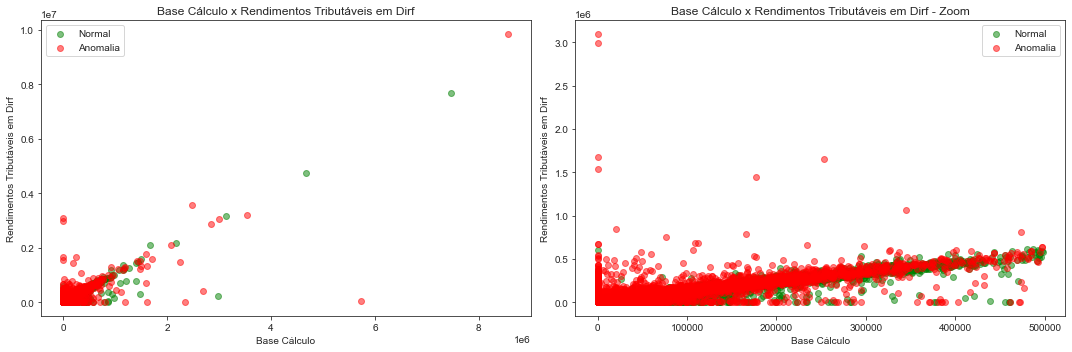

In [53]:
dispersao(['base_calculo', 'valor_dirf'],
          ['Base Cálculo', 'Rendimentos Tributáveis em Dirf'],
          'base_calculo < 500000')

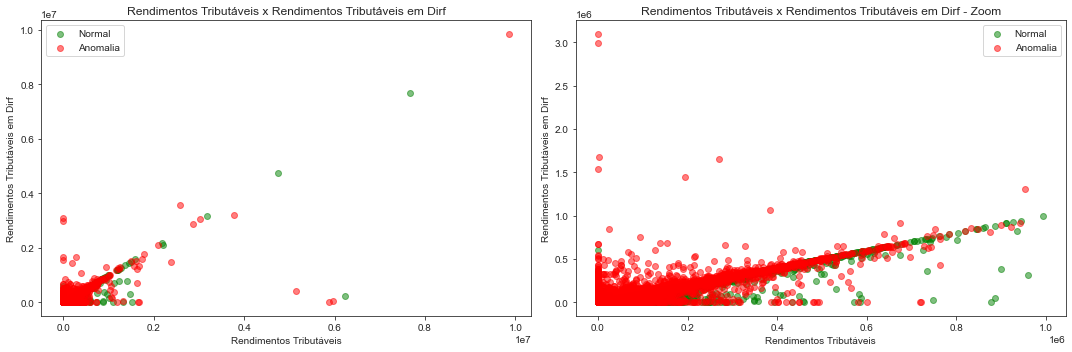

In [54]:
dispersao(['rend_tributavel', 'valor_dirf'],
          ['Rendimentos Tributáveis', 'Rendimentos Tributáveis em Dirf'],
          'rend_tributavel < 1000000')

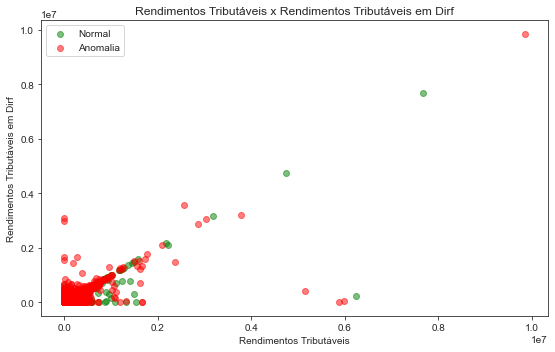

In [55]:
dispersao(['rend_tributavel', 'valor_dirf'],
          ['Rendimentos Tributáveis', 'Rendimentos Tributáveis em Dirf'])

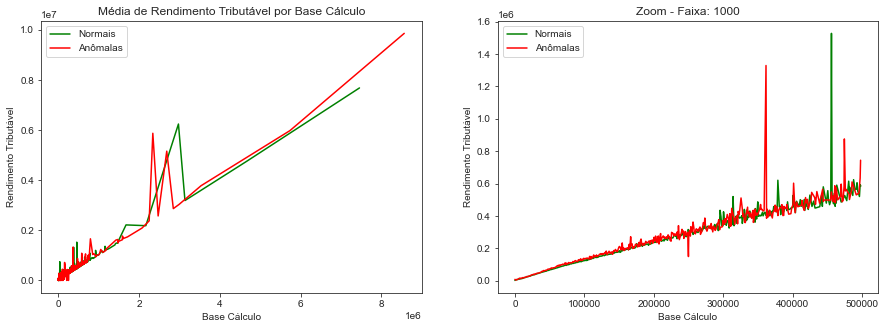

In [56]:
media(['base_calculo', 'rend_tributavel'], 
      ['Base Cálculo', 'Rendimento Tributável'], 'base_calculo<500000', [1000])

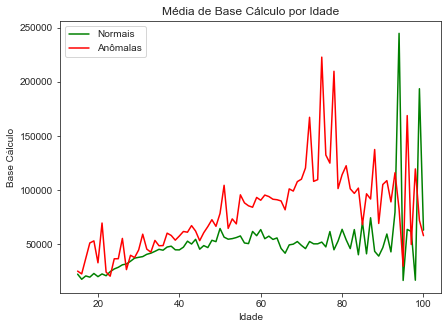

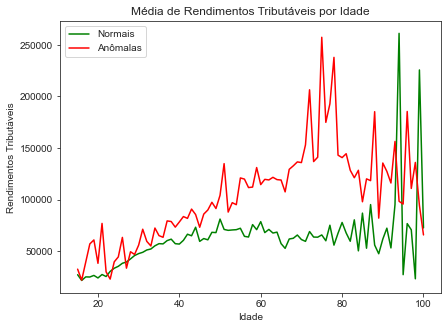

In [57]:
media(['idade','base_calculo'],['Idade', 'Base Cálculo'])
media(['idade','rend_tributavel'],['Idade', 'Rendimentos Tributáveis'])

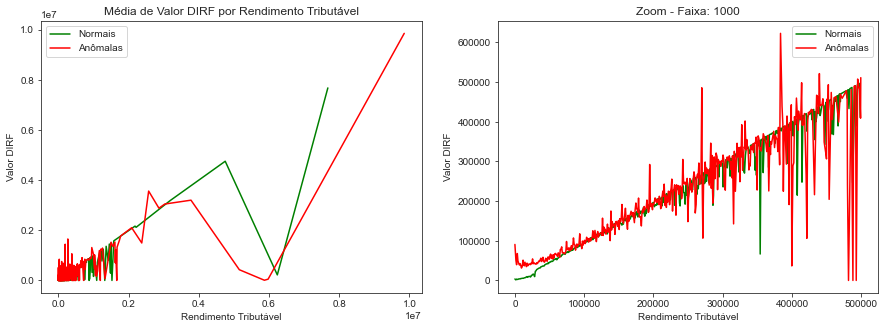

In [58]:
media(['rend_tributavel', 'valor_dirf'],['Rendimento Tributável', 'Valor DIRF'], 
      'rend_tributavel<500000', [1000])

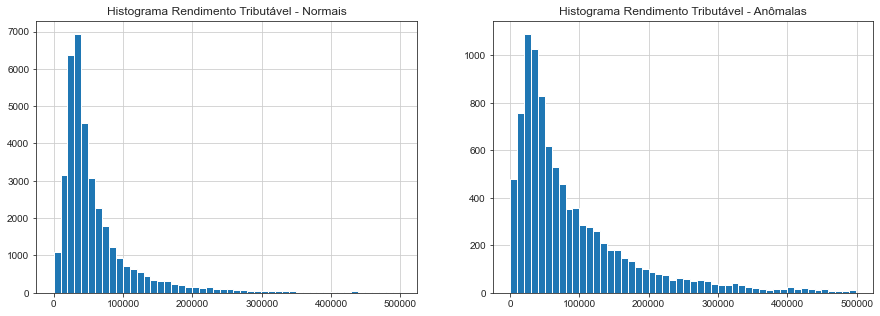

In [59]:
histograma('rend_tributavel', 'Rendimento Tributável', 'rend_tributavel > 0 & rend_tributavel < 500000')

### Agrupamento dos Rendimentos

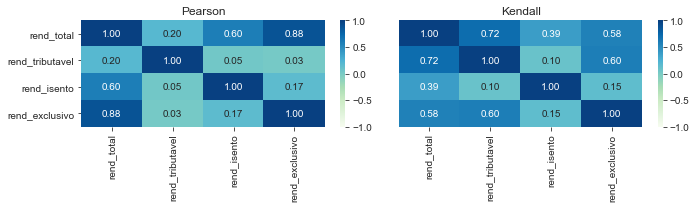

In [60]:
correlacao(['rend_total','rend_tributavel','rend_isento', 'rend_exclusivo'])

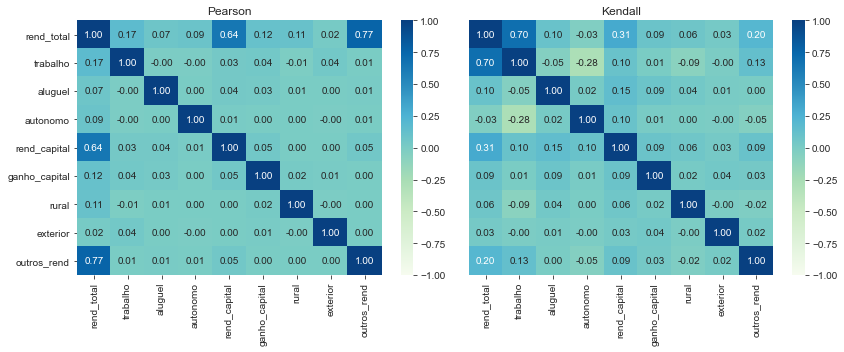

In [61]:
correlacao(['rend_total','trabalho','aluguel', 'autonomo', 'rend_capital', 
            'ganho_capital', 'rural', 'exterior', 'outros_rend'], 12 ,5)

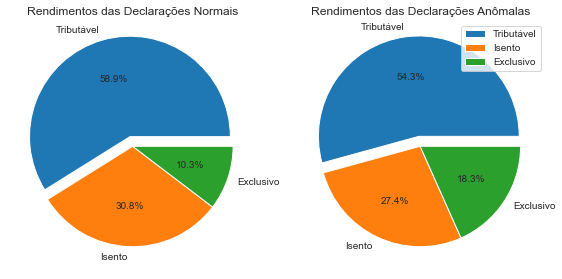

In [62]:
pizza(['rend_tributavel', 'rend_isento', 'rend_exclusivo'],
      ['Tributável', 'Isento', 'Exclusivo'],
      'Rendimentos das Declarações')

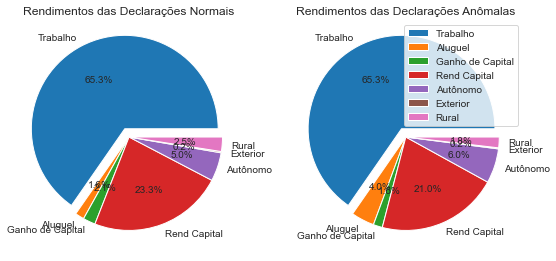

In [63]:
pizza(['trabalho', 'aluguel', 'ganho_capital', 'rend_capital', 'autonomo', 'exterior', 'rural'],
      ['Trabalho', 'Aluguel', 'Ganho de Capital', 'Rend Capital', 'Autônomo', 'Exterior', 'Rural'],
      'Rendimentos das Declarações')

### Rendimentos Tributáveis Informados em DIRF

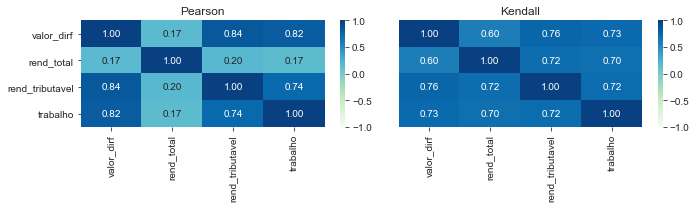

In [64]:
correlacao(['valor_dirf','rend_total', 'rend_tributavel', 'trabalho'])

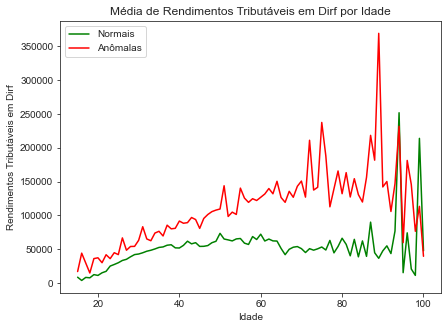

In [65]:
media(['idade', 'valor_dirf'], ['Idade', 'Rendimentos Tributáveis em Dirf'])

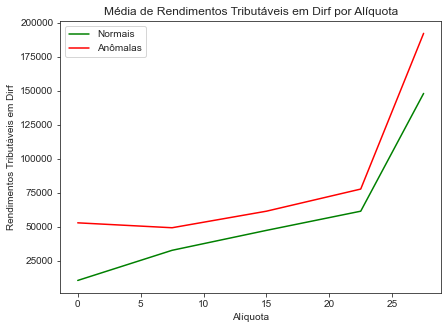

In [66]:
media(['aliquota', 'valor_dirf'], ['Alíquota', 'Rendimentos Tributáveis em Dirf'])

### Resultado Declaração, Imposto a Pagar e Imposto a Restituir

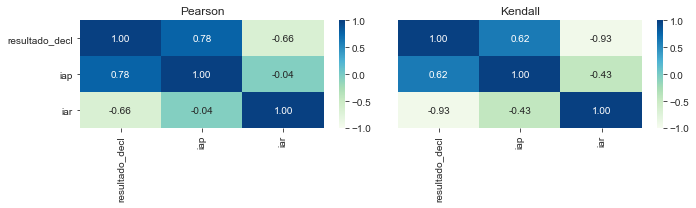

In [67]:
correlacao(['resultado_decl','iap', 'iar'])

### Deduções

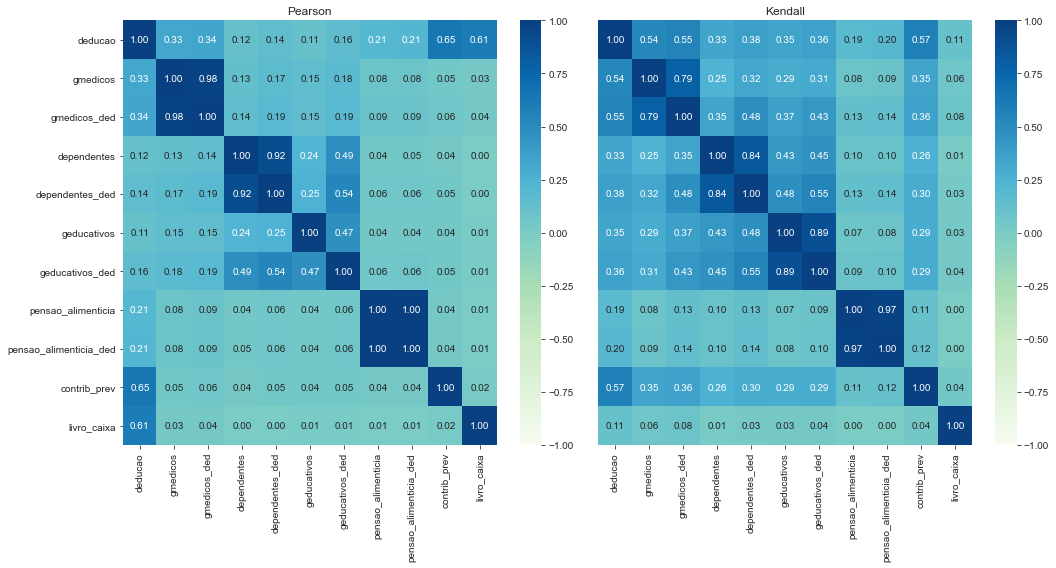

In [68]:
correlacao(['deducao','gmedicos', 'gmedicos_ded', 
            'dependentes', 'dependentes_ded', 'geducativos','geducativos_ded', 
            'pensao_alimenticia', 'pensao_alimenticia_ded', 'contrib_prev', 'livro_caixa'], 15, 8)

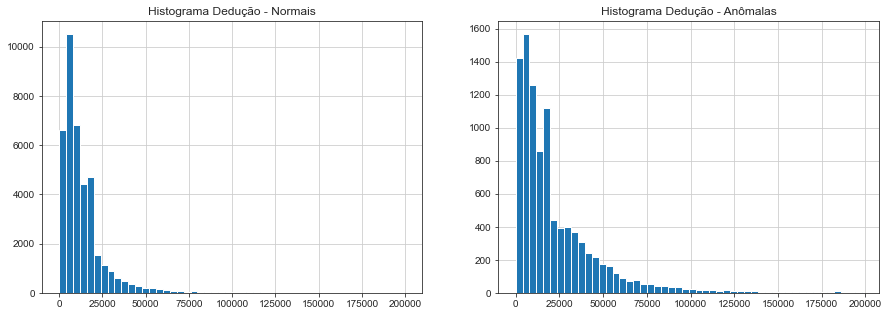

In [69]:
histograma('deducao', 'Dedução', 'deducao < 200000')

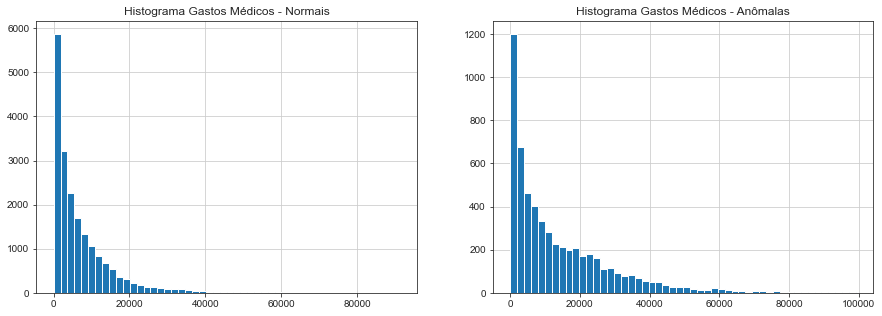

In [70]:
histograma('gmedicos', 'Gastos Médicos', 'gmedicos > 0 & gmedicos < 100000')

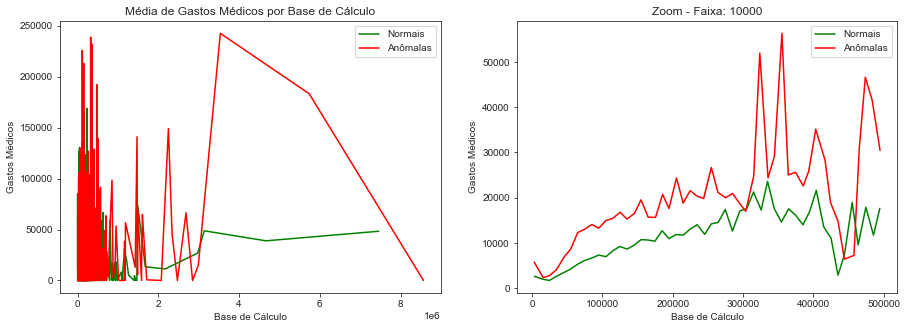

In [71]:
media(['base_calculo', 'gmedicos'], ['Base de Cálculo', 'Gastos Médicos'],
      'base_calculo<500000', [10000])

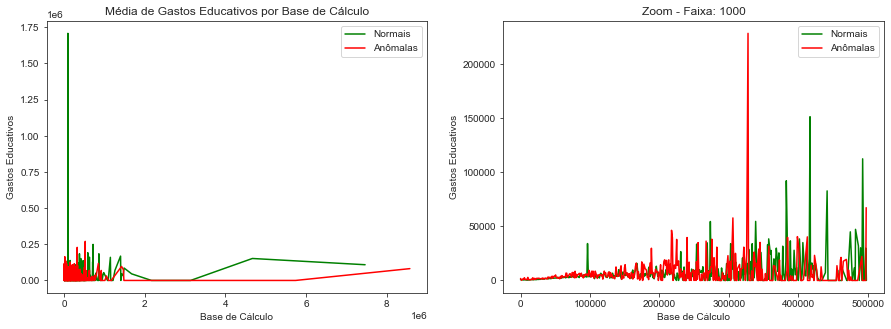

In [72]:
media(['base_calculo', 'geducativos'],['Base de Cálculo', 'Gastos Educativos'],
      'base_calculo<500000', [1000])

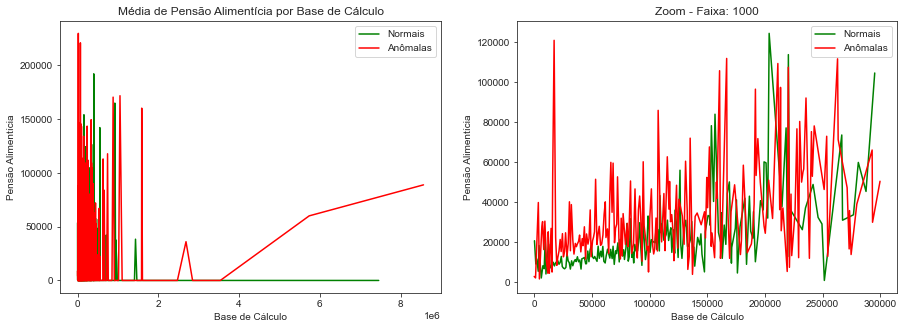

In [73]:
media(['base_calculo', 'pensao_alimenticia'],['Base de Cálculo', 'Pensão Alimentícia'],
      'pensao_alimenticia > 0 and base_calculo > 0 and base_calculo<300000', [1000])

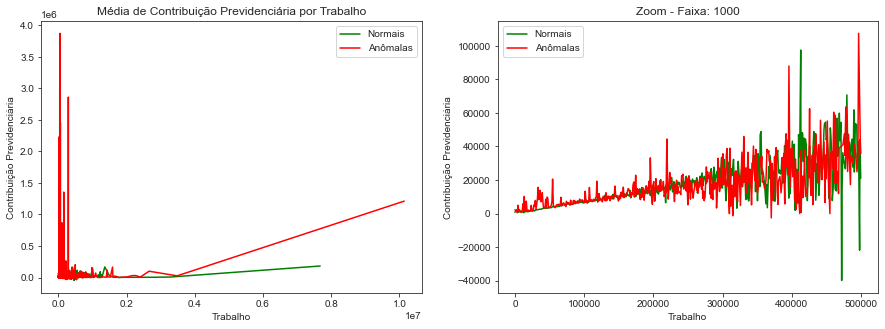

In [74]:
media(['trabalho', 'contrib_prev'],['Trabalho', 'Contribuição Previdenciária'],
      'contrib_prev < 500000 and trabalho<500000', [1000])

### Bens e Dívidas

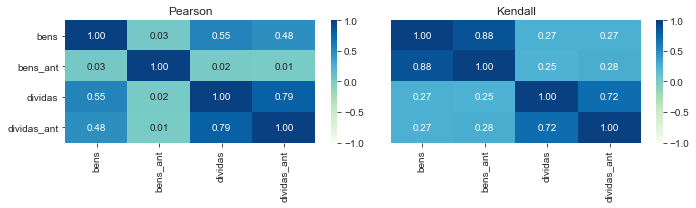

In [75]:
correlacao(['bens','bens_ant', 'dividas', 'dividas_ant'])

## Excluir Atributos

In [76]:
df.drop(['base_calculo', 'resultado_decl', 'imposto_devido2'], axis=1, inplace=True)
df.drop(['gmedicos_ded','dependentes_ded', 'geducativos_ded', 'pensao_alimenticia_ded'], axis=1, inplace=True)
df.drop(['bens_ant', 'tipo_decl', 'sexo', 'aliquota_efetiva', 'ocupacao', 'natureza'], axis=1, inplace=True)

In [77]:
df.isna().sum()

valor_dirf            0
rend_total            0
rend_tributavel       0
trabalho              0
aluguel               0
rend_capital          0
autonomo              0
livro_caixa           0
rural                 0
ganho_capital         0
exterior              0
outros_rend           0
rend_isento           0
rend_exclusivo        0
contrib_prev          0
pensao_alimenticia    0
geducativos           0
gmedicos              0
aliquota              0
imposto_devido        0
iap                   0
iar                   0
completa              0
deducao               0
idade                 0
casado                0
dependentes           0
alimentandos          0
bens                  0
dividas_ant           0
dividas               0
alvo                  0
gini                  0
POPULACAO             0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49358 entries, 0 to 49357
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   valor_dirf          49358 non-null  float64
 1   rend_total          49358 non-null  float64
 2   rend_tributavel     49358 non-null  float64
 3   trabalho            49358 non-null  float64
 4   aluguel             49358 non-null  float64
 5   rend_capital        49358 non-null  float64
 6   autonomo            49358 non-null  float64
 7   livro_caixa         49358 non-null  float64
 8   rural               49358 non-null  float64
 9   ganho_capital       49358 non-null  float64
 10  exterior            49358 non-null  float64
 11  outros_rend         49358 non-null  float64
 12  rend_isento         49358 non-null  float64
 13  rend_exclusivo      49358 non-null  float64
 14  contrib_prev        49358 non-null  float64
 15  pensao_alimenticia  49358 non-null  float64
 16  gedu